In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [3]:
encoding = 'latin1'
cards_cleaned = pd.read_csv('cards_cleaned.csv', encoding=encoding)

In [4]:
cards_cleaned.head(5)

,card_id,playerClass,type,name,set,text,mana cost,attack,health,rarity,collectible,flavor,sentiment
0,AT_132,NEUTRAL,MINION,Justicar Trueheart,TGT,<b>Battlecry:</b> Replace your starting Hero P...,6,6,3,LEGENDARY,True,It's like putting racing stripes and a giant s...,very positive
1,AT_131,NEUTRAL,MINION,Eydis Darkbane,TGT,Whenever <b>you</b> target this minion with a ...,3,3,4,LEGENDARY,True,"HATES being called ""the wonder twins"".",very negative
2,EX1_583,NEUTRAL,MINION,Priestess of Elune,EXPERT1,<b>Battlecry:</b> Restore 4 Health to your hero.,6,5,4,COMMON,True,"If she threatens to ""moon"" you, it's not what ...",negative
3,CFM_095,NEUTRAL,MINION,Weasel Tunneler,GANGS,<b>Deathrattle:</b> Shuffle this minion into y...,1,1,1,EPIC,True,He's the reason the First Bank of Gadgetzan ha...,positive
4,BRM_018,PALADIN,MINION,Dragon Consort,BRM,<b>Battlecry:</b> The next Dragon you play cos...,5,5,5,RARE,True,Everybody wants someone to snuggle with. Even ...,very negative


Checking card's rarity values

In [5]:
cards_cleaned['rarity'].unique()

array(['LEGENDARY', 'COMMON', 'EPIC', 'RARE', 'FREE'], dtype=object)

In [6]:
# mapping
rarity_mapping = {
    'LEGENDARY': 4,
    'COMMON': 1,
    'EPIC': 3,
    'RARE': 2,
    'FREE': 0  
}

In [7]:
cards_cleaned['rarity_encoded'] = cards_cleaned['rarity'].map(rarity_mapping)

In [8]:
cards_cleaned.head(5)

,card_id,playerClass,type,name,set,text,mana cost,attack,health,rarity,collectible,flavor,sentiment,rarity_encoded
0,AT_132,NEUTRAL,MINION,Justicar Trueheart,TGT,<b>Battlecry:</b> Replace your starting Hero P...,6,6,3,LEGENDARY,True,It's like putting racing stripes and a giant s...,very positive,4
1,AT_131,NEUTRAL,MINION,Eydis Darkbane,TGT,Whenever <b>you</b> target this minion with a ...,3,3,4,LEGENDARY,True,"HATES being called ""the wonder twins"".",very negative,4
2,EX1_583,NEUTRAL,MINION,Priestess of Elune,EXPERT1,<b>Battlecry:</b> Restore 4 Health to your hero.,6,5,4,COMMON,True,"If she threatens to ""moon"" you, it's not what ...",negative,1
3,CFM_095,NEUTRAL,MINION,Weasel Tunneler,GANGS,<b>Deathrattle:</b> Shuffle this minion into y...,1,1,1,EPIC,True,He's the reason the First Bank of Gadgetzan ha...,positive,3
4,BRM_018,PALADIN,MINION,Dragon Consort,BRM,<b>Battlecry:</b> The next Dragon you play cos...,5,5,5,RARE,True,Everybody wants someone to snuggle with. Even ...,very negative,2


In [9]:
cards_cleaned.shape

(1024, 14)

Removing outliers

In [10]:
from scipy import stats

# Select the columns of interest
columns_of_interest = ['mana cost', 'attack', 'health']

# Calculate Z-scores for the selected columns
z_scores_selected_columns = stats.zscore(cards_cleaned[columns_of_interest])

# Identify outliers using a threshold (e.g., 3 standard deviations)
outliers_selected_columns = (z_scores_selected_columns > 3) | (z_scores_selected_columns < -3)

# Create a mask for rows without outliers
rows_without_outliers_mask = ~outliers_selected_columns.any(axis=1)

# Create a new DataFrame without outliers
cards_cleaned = cards_cleaned[rows_without_outliers_mask]

# Display the shape of the new DataFrame without outliers
print("Shape of DataFrame without outliers:", cards_cleaned.shape)


Shape of DataFrame without outliers: (1013, 14)


In [11]:
# removing individual colums

columns_to_remove = ['card_id', 'text', 'flavor', 'name', 'rarity_encoded']

# Create a new DataFrame without the specified columns
cards_new = cards_cleaned.drop(columns=columns_to_remove)

# Display the new DataFrame
print(cards_new)

     playerClass    type      set  mana cost  attack  health     rarity  \
0        NEUTRAL  MINION      TGT          6       6       3  LEGENDARY   
1        NEUTRAL  MINION      TGT          3       3       4  LEGENDARY   
2        NEUTRAL  MINION  EXPERT1          6       5       4     COMMON   
3        NEUTRAL  MINION    GANGS          1       1       1       EPIC   
4        PALADIN  MINION      BRM          5       5       5       RARE   
...          ...     ...      ...        ...     ...     ...        ...   
1019        MAGE  MINION  EXPERT1          7       5       7  LEGENDARY   
1020      PRIEST   SPELL  EXPERT1          6       0       0       RARE   
1021       DRUID   SPELL      TGT          3       0       0       EPIC   
1022     NEUTRAL  MINION  EXPERT1          1       1       1       RARE   
1023        MAGE   SPELL  EXPERT1          1       0       0     COMMON   

      collectible      sentiment  
0            True  very positive  
1            True  very negat

Correlation

In [12]:
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(cards_new)
categorical_features

['playerClass', 'type', 'set', 'rarity', 'sentiment']

In [13]:
from dython.nominal import associations

In [14]:
# extracting overall from the dataframe
target = cards_new.pop("rarity")
# inserting in the last position
cards_new.insert(len(cards_new.columns), "rarity", target)

c:\Users\Administrator\anaconda3\Lib\site-packages\dython\nominal.py:298: RuntimeWarning: Rounded eta = 1.0000000000000002 to 1. This is probably due to floating point precision issues.
  warnings.warn(


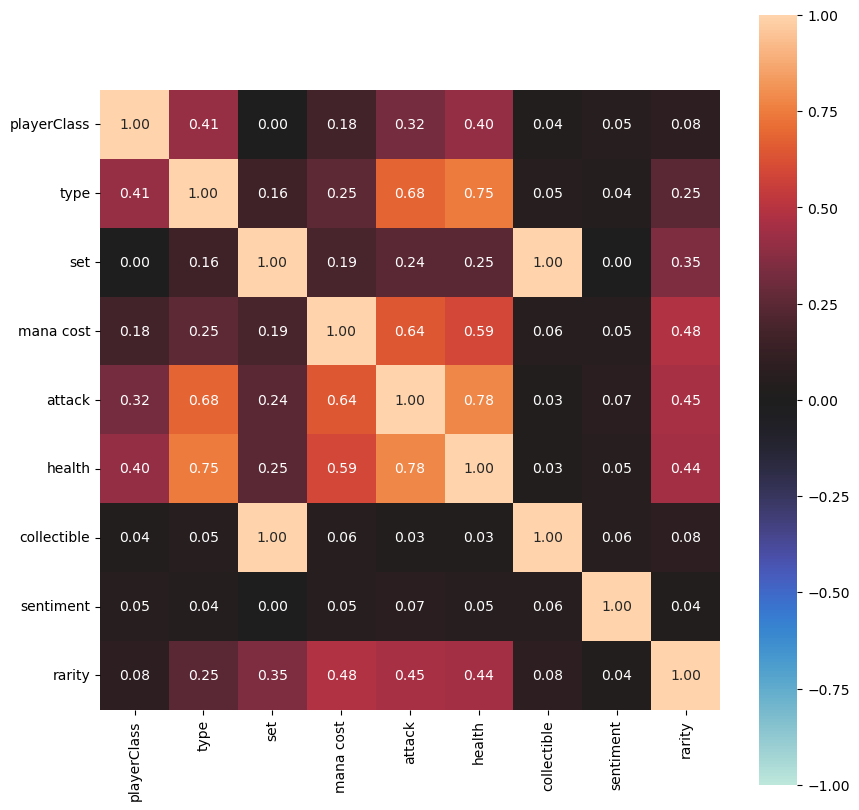

In [15]:
complete_correlation= associations(cards_new, filename= 'complete_correlation.png', figsize=(10,10))

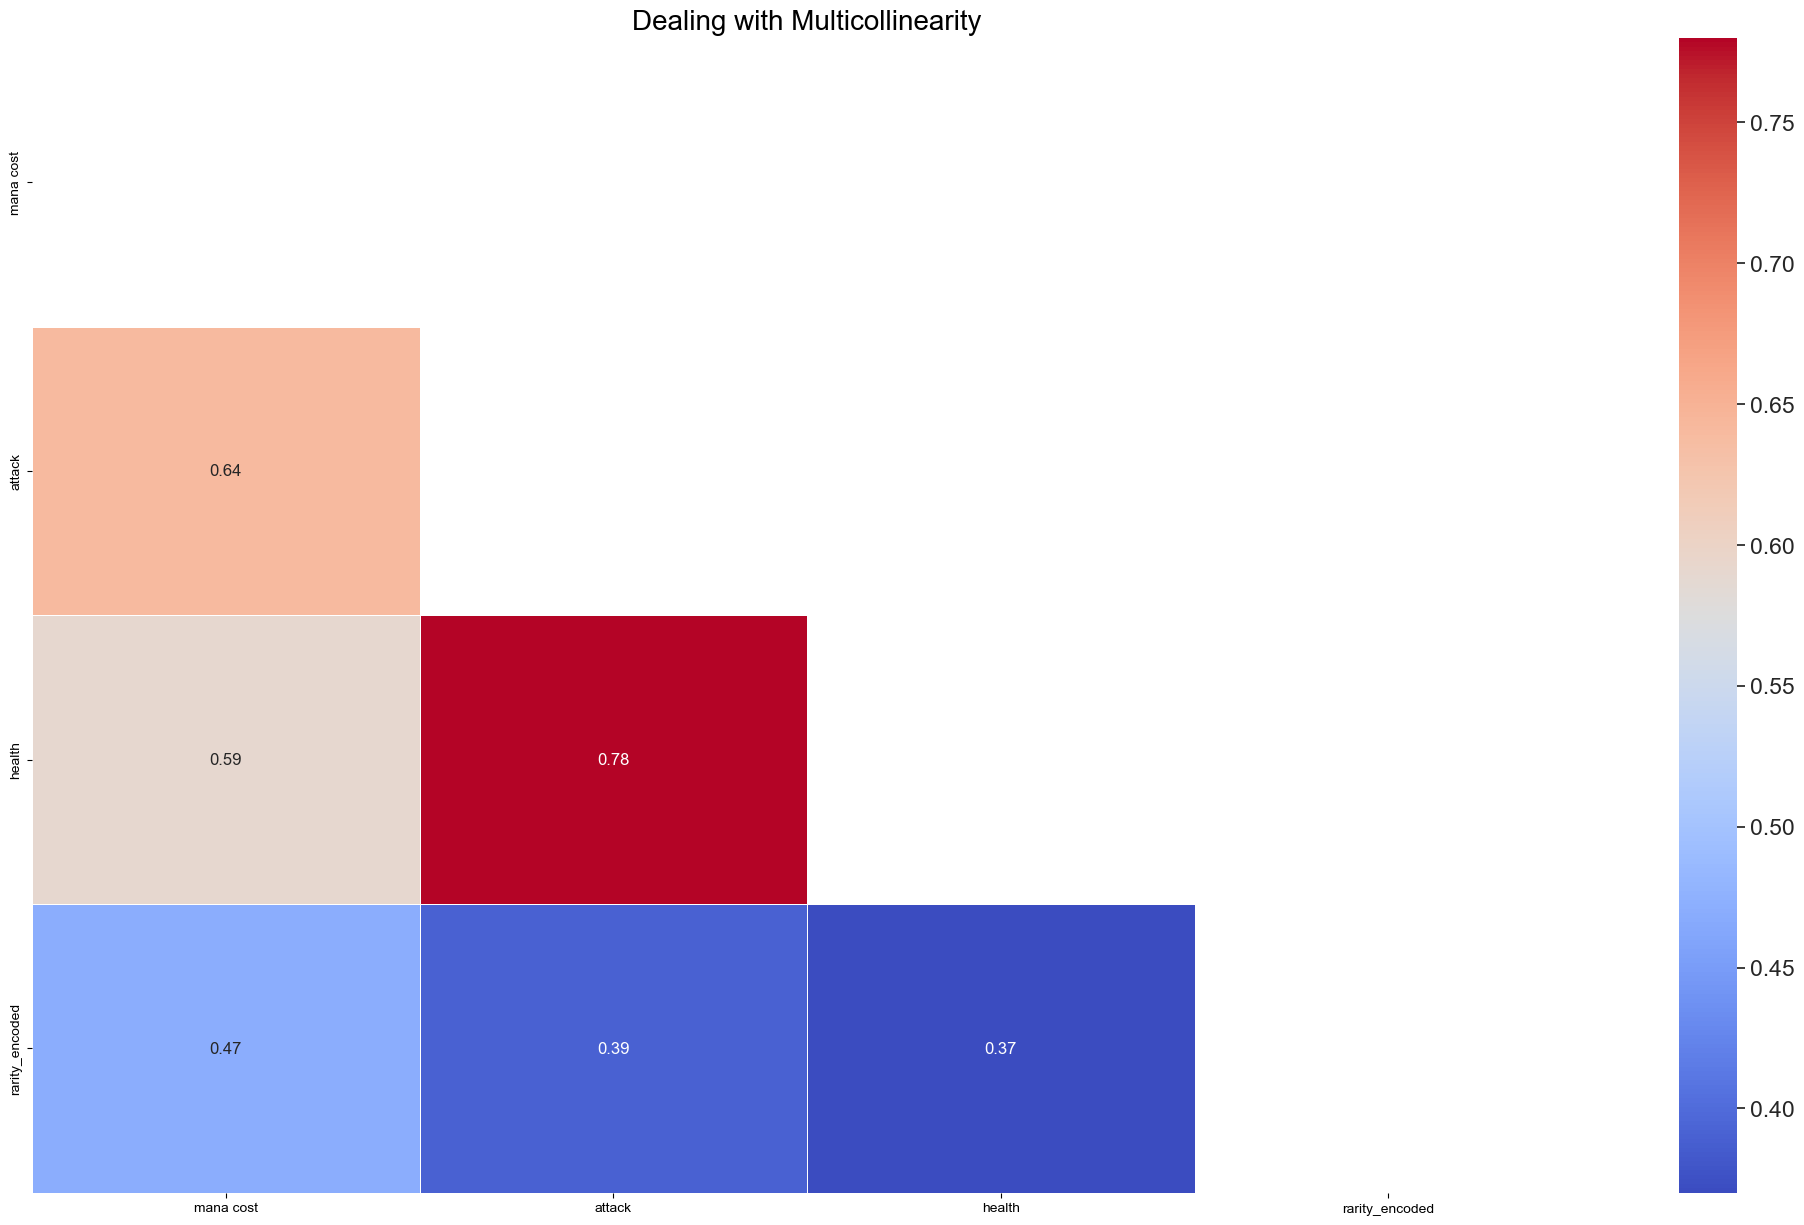

In [16]:
num = cards_cleaned.select_dtypes(np.number)

num_corr = round(num.corr(), 2) # standard is pearson # make the correlation matrix
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size
ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

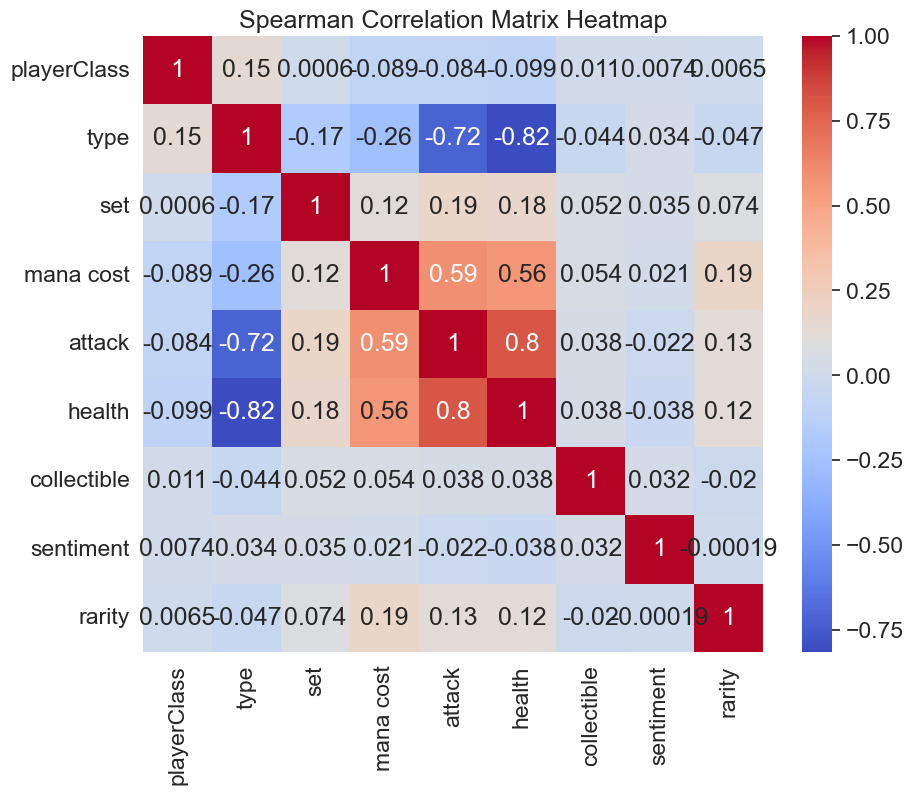

In [17]:
from scipy.stats import spearmanr
correlation_matrix, _ = spearmanr(cards_new)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=cards_new.columns, yticklabels=cards_new.columns)
plt.title('Spearman Correlation Matrix Heatmap')
plt.show()

Overall Mana cost, attack and health has good correlation.